# Proyek Analisis Data: Bike sharing dataset
- Nama: Humam Fawwaz Abiyyu Binekas
- Email: humamfa16@gmail.com
- Id Dicoding: humamfa

## Menentukan Pertanyaan Bisnis

- Apakah pengguna lebih sering menyewa sepeda pada hari kerja dibandingkan pada hari libur?
- Seberapa banyak pengguna yang menyewa sepeda pada 4 bulan/120 hari terakhir?

## **Menyiapkan semua library yang dibutuhkan**

In [57]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

Memuat tabel day_df (tabel berisi data penyewaan sepeda per hari)

In [59]:
day_df = pd.read_csv("data/day.csv")
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
224,225,2011-08-13,3,0,8,0,6,0,2,0.685833,0.645858,0.729583,0.211454,1504,2646,4150
14,15,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222,1026,1248
203,204,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285
530,531,2012-06-14,2,1,6,0,4,1,1,0.648333,0.624383,0.569583,0.253733,1180,6183,7363
60,61,2011-03-02,1,0,3,0,3,1,1,0.335000,0.320071,0.449583,0.307833,231,1903,2134
429,430,2012-03-05,1,1,3,0,1,1,1,0.243333,0.241171,0.506250,0.228858,203,3130,3333
679,680,2012-11-10,4,1,11,0,6,0,1,0.389167,0.393937,0.645417,0.057846,2090,4446,6536
294,295,2011-10-22,4,0,10,0,6,0,1,0.422500,0.425492,0.629167,0.092667,1499,2809,4308
468,469,2012-04-13,2,1,4,0,5,1,1,0.442500,0.431808,0.408333,0.155471,1252,5146,6398
348,349,2011-12-15,4,0,12,0,4,1,2,0.422500,0.412237,0.634167,0.268042,181,3528,3709


Memuat tabel hour_df (tabel berisi data penyewaan sepeda per jam)

In [60]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2475,2476,2011-04-18,2,0,4,1,0,1,1,1,0.46,0.4545,0.47,0.1343,11,8,19
17161,17162,2012-12-22,1,1,12,20,0,6,0,1,0.24,0.2424,0.48,0.1642,6,55,61
16748,16749,2012-12-05,4,1,12,15,0,3,1,1,0.48,0.4697,0.33,0.2836,20,265,285
9983,9984,2012-02-26,1,1,2,0,0,0,0,1,0.24,0.2121,0.41,0.3582,7,63,70
11621,11622,2012-05-04,2,1,5,10,0,5,1,2,0.62,0.5909,0.73,0.1343,45,154,199
13017,13018,2012-07-01,3,1,7,14,0,0,0,1,0.92,0.8333,0.33,0.2537,98,346,444
11551,11552,2012-05-01,2,1,5,12,0,2,1,2,0.70,0.6515,0.58,0.2239,41,228,269
3690,3691,2011-06-07,2,0,6,16,0,2,1,1,0.80,0.7121,0.38,0.2239,55,253,308
17023,17024,2012-12-17,4,1,12,2,0,1,1,2,0.38,0.3939,0.94,0.0000,1,4,5
9013,9014,2012-01-16,1,1,1,10,1,1,0,2,0.14,0.1364,0.59,0.1940,19,107,126


**Keterangan:**
**instant**: index data;
**dteday**: tanggal;
**season**: musim (1:spring, 2:summer, 3:fall, 4:winter);
**yr**: tahun (1: 2011, 2:2012);
**mnth**: bulan
**holiday**: hari libur (0: bukan hari libur, 1: hari libur);
**weekday**: hari ke- per minggu;
**workingday**: hari kerja (0: akhir pekan atau holiday, 1: hari kerja);
**weathersit**: cuaca (1: cerah/berawan, 2: berkabut, 3: bersalju, 4: cuaca ekstrim);
**temp**: suhu yang terukur dalam Celcius;
**atemp**: suhu yang dirasakan dalam Celcius;
**hum**: humidity/kelembapan;
**windspeed**: kecepatan angin;
**casual**: jumlah pengguna casual yang menyewa sepeda;
**registered**: jumlah pengguna terdaftar yang menyewa sepeda;
**cnt**: total jumlah pengguna yang menyewa sepeda (casual dan registered)

### Assessing Data

Menilai data day_df

In [61]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [62]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Didapatkan hasil bahwa tidak ada duplikasi data, namun tipe data 'dteday' bukan datetime melainkan object

Menilai data hour_df

In [63]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [64]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Didapatkan hasil bahwa tidak ada duplikasi data, namun tipe data 'dteday' bukan *datetime* melainkan *object*

### Cleaning Data

Mengubah tipe data 'dteday' dari *object* menjadi *datetime*

In [65]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [66]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [67]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explorasi data day_df

In [68]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Melihat data jumlah penyewa sepeda (*cnt*) berdasarkan hari kerja (*workingday*)

In [69]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]
})

instant  cnt                                
           nunique  min   max         mean          std
workingday                                             
0              231  605  8714  4330.168831  2052.141245
1              500   22  8362  4584.820000  1878.415583

Melihat data jumlah penyewa sepeda (*cnt*) berdasarkan kondisi cuaca (*weathersit*)

In [70]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]
})

instant  cnt                                
           nunique  min   max         mean          std
weathersit                                             
1              463  431  8714  4876.786177  1879.483989
2              247  605  8362  4035.862348  1809.109918
3               21   22  4639  1803.285714  1240.284449

### Explorasi hour_df

Melihat data jumlah penyewa sepeda (*cnt*) berdasarkan hari kerja (*workingday*)

In [71]:
hour_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]
})

instant cnt                             
           nunique min  max        mean         std
workingday                                         
0             5514   1  783  181.405332  172.853832
1            11865   1  977  193.207754  185.107477

Melihat data jumlah penyewa sepeda (*cnt*) berdasarkan kondisi cuaca (*weathersit*)

In [72]:
hour_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]
})

instant cnt                             
           nunique min  max        mean         std
weathersit                                         
1            11413   1  977  204.869272  189.487773
2             4544   1  957  175.165493  165.431589
3             1419   1  891  111.579281  133.781045
4                3  23  164   74.333333   77.925178

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah pengguna lebih sering menyewa sepeda pada hari kerja dibandingkan pada hari libur?

<Axes: xlabel='cnt', ylabel='workingday'>

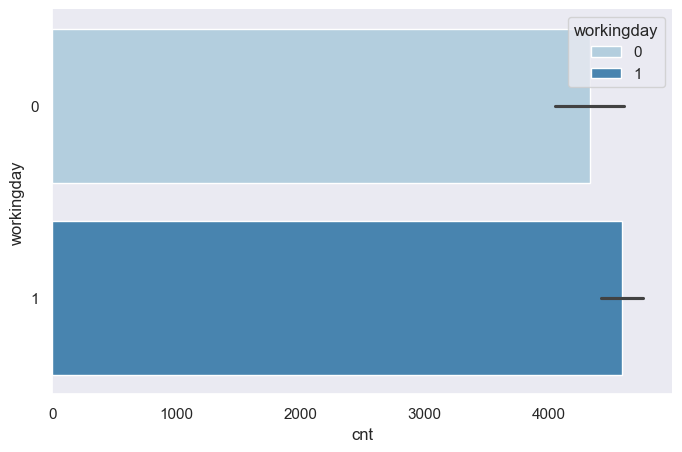

In [73]:
f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)
sns.barplot(y=day_df['workingday'], x=day_df['cnt'], data=day_df, palette='Blues', hue=day_df['workingday'], orient='h')

<Axes: xlabel='cnt', ylabel='workingday'>

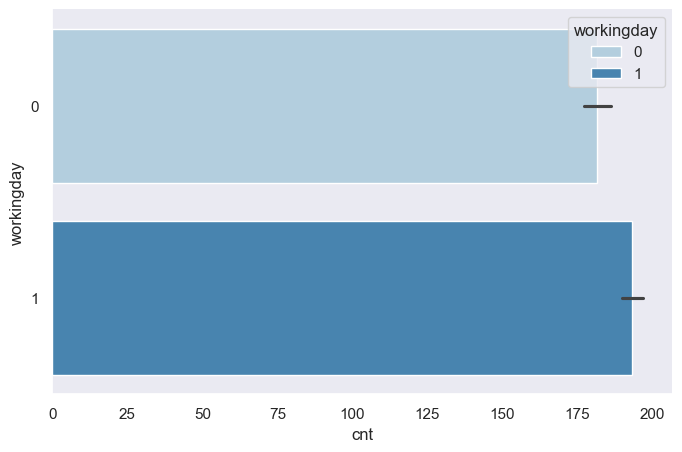

In [74]:
f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)
sns.barplot(y=hour_df['workingday'], x=hour_df['cnt'], data=hour_df, palette='Blues', hue=hour_df['workingday'], orient='h')

Bar berwarna biru muda menggambarkan jumlah penyewa sepeda di hari libur/weekend dan bar berwarna biru tua menggambarkan jumlah penyewa sepeda di hari kerja. Baik dari data 'day_df' dan 'hour_df', didapatkan bahwa terdapat lebih banyak jumlah penyewa sepeda pada hari kerja dibandingkan pada hari libur/weekend

### Pertanyaan 2:

Membuat line chart untuk melihat tren jumlah pengguna sepeda dalam 4 bulan (120 hari) terakhir.

<Axes: xlabel='mnth', ylabel='cnt'>

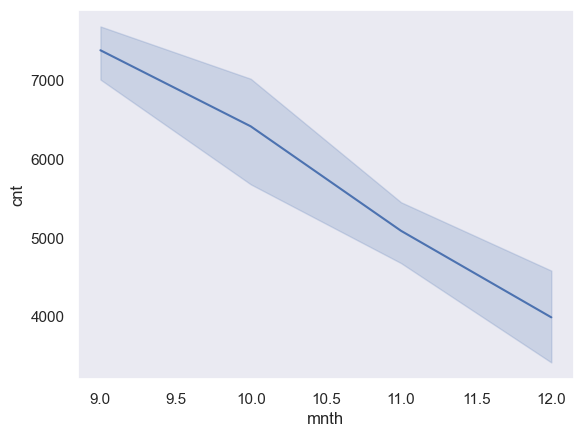

In [75]:
last120days_day_df = day_df.tail(120)
sns.lineplot(x='mnth', y='cnt', data=last120days_day_df)

Dari line chart terlihat adanya tren jumlah penyewa sepeda yang menurun dalam 4 bulan (120 hari) terakhir.

## Conclusion

- Terdapat lebih banyak penyewa sepeda pada hari kerja dibandingkan pada hari libur/weekend
- Jumlah penyewa sepeda sedang dalam tren menurun dalam 4 bulan terakhir.